In [1]:
from wovenv.ai.q_learning import QLearningAgent
from wovenv.venv.env import Env
from IPython.display import clear_output

In [11]:
env = Env()
agent = QLearningAgent(alpha=1, discount=0.1)

In [3]:
def get_epsilon(play_id, mv):
    return mv - mv / (1 + play_id ** (-1/2))

In [4]:
def generate_session(env: Env, agent: QLearningAgent, t_max=1000, train=False):
    env.write_log = not train
    total_reward = 0
    s = env.reset()

    for t in range(t_max):
        a = agent.get_action(s)
        next_s, r, done = env.step(a)

        if train:
            agent.update(s, a, next_s, r, done)

        total_reward += r
        s = next_s

        if done:
            if not train: env.finish_log()
            break

    return total_reward

In [5]:
def hot_start(env: Env, agent: QLearningAgent, ind, t_max=1000):
    clear_output()
    print(f'start {ind}')
    s = env.reset()

    for t in range(t_max):
        acs = env._get_actions()
        for a in acs:
            next_s, r, done = env.step(a)
            agent.update(s, a, next_s, r, done)
            s = next_s
            if done: return

In [18]:
for i in range(1000):
    hot_start(env, agent, i)

start 999


0.027687451912468963


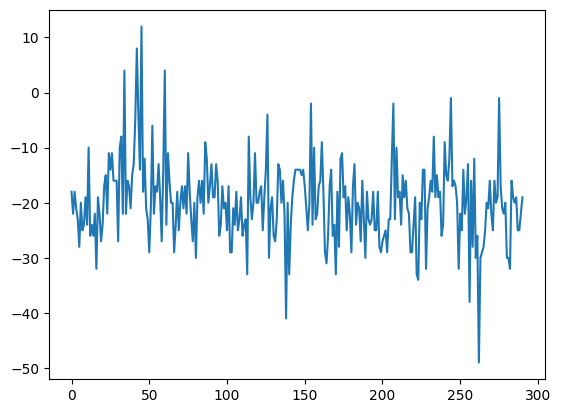

KeyboardInterrupt: 

In [9]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from collections import deque

for _ in range(1):
    agent.epsilon = 1

    rewards = deque()
    for i in range(3000):
        rewards.append(generate_session(env,agent,train=True))
        if i % 1 == 0: agent.epsilon = get_epsilon(i + 1, 1)
        if i % 1 == 0:
            clear_output(True)
            print(agent.epsilon)
            plt.plot(rewards)
            plt.show()

In [ ]:
import pickle

In [ ]:
with open('data.pickle', "wb") as f:
    pickle.dump(agent, f)

In [ ]:
agent = pickle.load(open('data.pickle', 'rb'))

In [10]:
agent.epsilon = 0
generate_session(env, agent)

-18

In [ ]:
s = env.reset()
arr = s.get_legal_actions()
print(arr)

[<wovenv.venv.snapshot.Action object at 0x7fe9a1f6e050>, <wovenv.venv.snapshot.Action object at 0x7fe9a8dee510>, <wovenv.venv.snapshot.Action object at 0x7fe9a8decb50>, <wovenv.venv.snapshot.Action object at 0x7fe9a9105dd0>, <wovenv.venv.snapshot.Action object at 0x7fe9a1d7a010>, <wovenv.venv.snapshot.Action object at 0x7fe9ac026110>]
